# Udacity Project: Writing a Data Science Blog Post
## House Prices - Residential Homes in Ames, Iowa

<br>

Name: Zhenli Jin

---

<a id='top'></a>
## Table of Contents

[1. Introduction](#intro)

[2. Data Overview](#overview)

[3. Business Questions](#question)

[4. Modeling](#model)

[5. Results](#result)

[6. Conlusion](#conclusion)

<a id='intro'></a>
## 1. Introduction

When people consider their dream house, sometimes the living area of the house or whether there is a pool is not the most important part that people struggle with but the price. Therefore, an accurate estimate of the house price is valuable in that the estimate provides useful
information to prospective home buyers for evaluating and comparing to the list price before they make their decision.

We will use the dataset obtained from Kaggle Competition [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) 

Of general interest is determining which factors are most predictive of house prices as well as the accuracy of models that include these
predictors. In addition, we will study some business questions to better understand our dataset.

[Back to top](#top)

<a id='overview'></a>
## 2. Data Overview

**Data Overview:** The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It is an incredible dataset for data science students to begin their practices on statistics and machine learning basics.

**Task:** To better understand the dataset, we will first study on the following two business questions:

1. What story can we tell from our target variable `SalePrice`?
2. What features do people care about most when they buy a house?
    
Then we will built a linear regression model to predict the house prices with appropriate features.

3. Implementing a linear regression to predict the house prices.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data
train = pd.read_csv("D:/Udacity/Project 1/udacity-project-blog-post/train.csv", na_values='NaN')
test = pd.read_csv("D:/Udacity/Project 1/udacity-project-blog-post/test.csv", na_values='NaN')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We save and then drop the `Id` columns in both sets because they are not necessary in our predictive model.

In [3]:
trainId = train['Id']
testId = test['Id']

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

In [4]:
print("There are {} rows and {} columns in our training set.".format(train.shape[0], train.shape[1]))
print("There are {} rows and {} columns in our test set.".format(test.shape[0], test.shape[1]))

num_vars = train.select_dtypes(include=['int64', 'float64']) #numerical variables
cat_vars = train.select_dtypes(include=['object']) #categorical variables

print("There are {} numerical variables and {} categorical variables.".format(num_vars.shape[1], cat_vars.shape[1]))

There are 1460 rows and 80 columns in our training set.
There are 1459 rows and 79 columns in our test set.
There are 37 numerical variables and 43 categorical variables.


[Back to top](#top)

<a id='question'></a>
## 3. Business Questions

### 3.1 What story can we tell from our target variable `SalePrice`?

Let's first take a look at the statistics summary.

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So we have 1460 instances, and the average price is 181k and the median is 163k. Note that the lowest price is 34.9k and the most expensive one is 755k, so the range is 720100.

Then let's check the distribution of the house price.

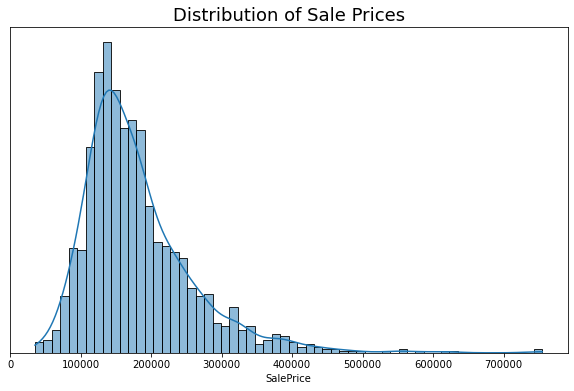

In [6]:
plt.figure(figsize=(10,6))
p1 = sns.histplot(data=train, x='SalePrice', kde=True, bins=60)
p1.set(yticklabels='', ylabel='')
p1.tick_params(left=False)
plt.title('Distribution of Sale Prices', fontsize=18)
plt.show()

We notice that the prices were right skewed which is in line with our expectation that the more expensive the price is, the fewer people could afford it. Also, it reminds us that since there exists skewness in our target variable, we should pay more attention to the normality when builting the model.

According to the distribution, we believe that there must be some outliers. Let's check the boxplot.

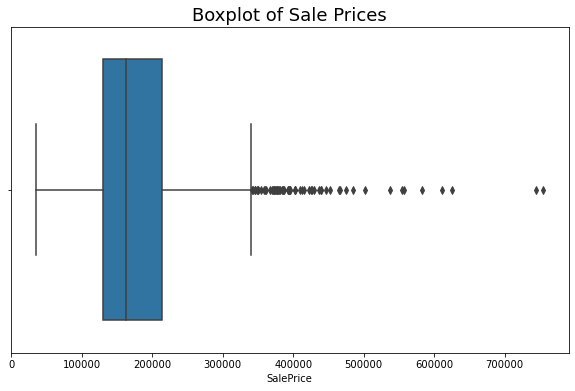

In [7]:
plt.figure(figsize=(10,6))
p2 = sns.boxplot(data=train, x='SalePrice')
plt.title('Boxplot of Sale Prices', fontsize=18)
plt.show()

From the above boxplot, we see that there are many outliers in our response variable. We will deal with these outliers in the following step.

### 3.2 What features do people care about most when they buy a house? (focus on numerical variables)

To get into this question, we are going to study the correlations of numerical predictors with sale prices. As mentioned above, we have 37 numerical variables; however, not every predictor is reasonble and meaningful in numerical form. For example, `OverallQual` is the rates of overall material and finish of the house and it is in ordinal form. Thus, we should consider `OverallQual` as a ordinal categorical variable. We will study categorical variables later. In addition, note that the variable `SalePrice` is also in numerical form, but it should not being considered as a predictor.

In [8]:
num_vars.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Based on the data description offered by the data contributor, we will select the numerical predictors by eyes and background knowledge. Note that most of them are about the area.

In [9]:
num_vars1 = num_vars.copy()[['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]
num_vars1

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,208500,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0
1,181500,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0
2,223500,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0
3,140000,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0
4,250000,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0
1456,210000,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0
1457,266500,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500
1458,142125,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0


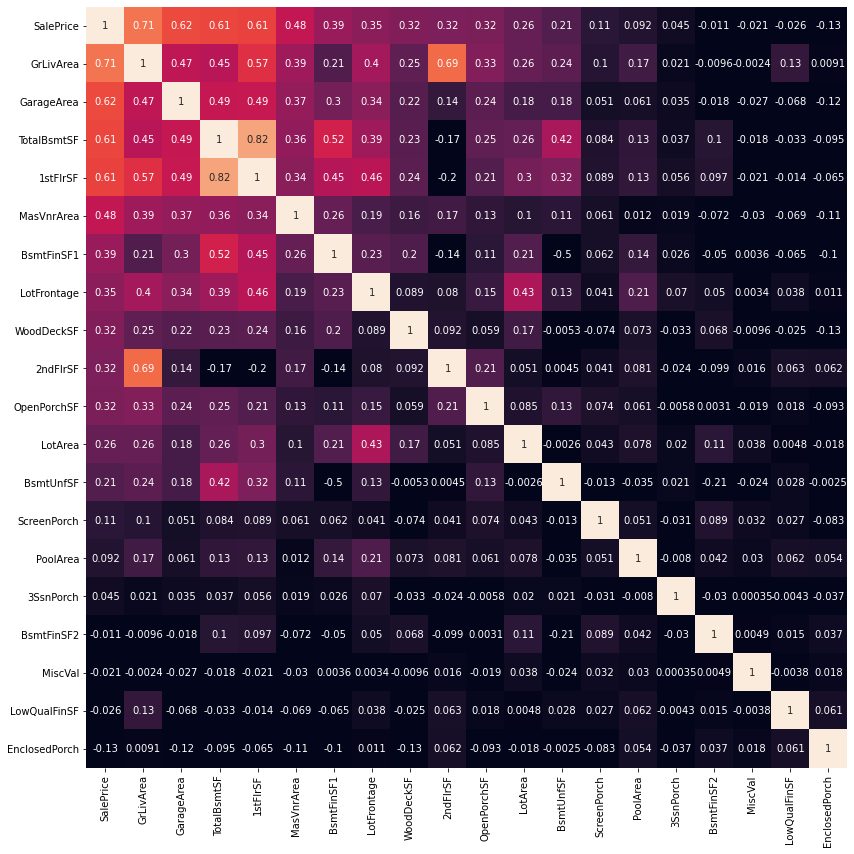

In [10]:
corr = num_vars1.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(corr.sort_values(by=['SalePrice'], ascending=False)[corr.sort_values(by=['SalePrice'], ascending=False).index], 
            vmin=0, vmax=1, square=True, annot=True, cbar=False)
plt.show()

We visualize the relationship between `SalePrice` and the two predictors with the highest correlation with `SalePrice`, namely `GrLivArea` and `GarageArea`.

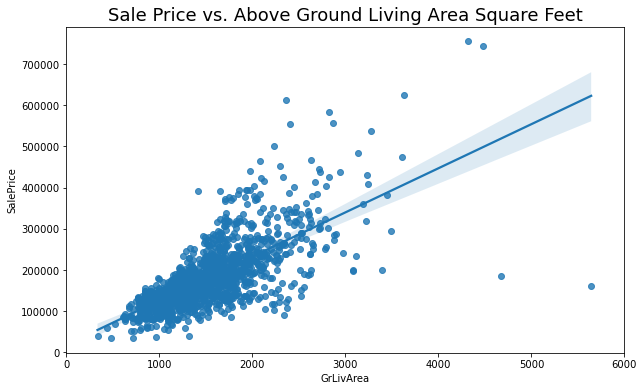

In [11]:
plt.figure(figsize=(10,6))
p3 = sns.regplot(x='GrLivArea', y='SalePrice', data=train)
p3.set(xlim=(0, 6000))
plt.title('Sale Price vs. Above Ground Living Area Square Feet', fontsize=18)
plt.show()

Notice that there are two points that have large living areas but really low prices. We will consider them as a potential outlier and might remove them from our dataset later.

In [12]:
train['SalePrice'][train['GrLivArea'] > 4500]

523     184750
1298    160000
Name: SalePrice, dtype: int64

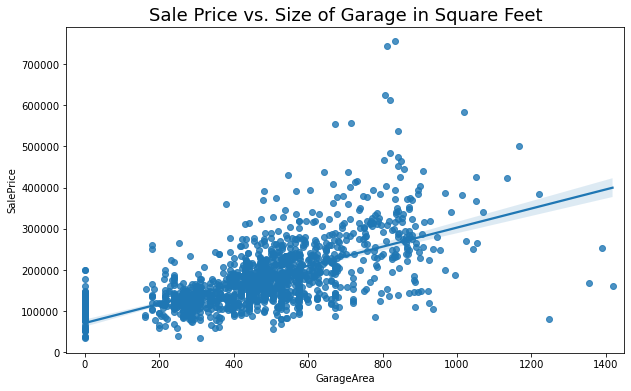

In [13]:
plt.figure(figsize=(10,6))
p4 = sns.regplot(x='GarageArea', y='SalePrice', data=train)
p4.set(xlim=(-50, 1450))
plt.title('Sale Price vs. Size of Garage in Square Feet', fontsize=18)
plt.show()

In [14]:
sum(train['GarageArea'] == 0)

81

Notice that there are 81 rows with `GarageArea` of 0 area. Since it is not a big impact and the value of 0 is meaningful, we decide to retain them for this column `GarageArea`.

[Back to top](#top)

<a id='model'></a>
## 4. Modeling

To keep consistency of both training set and test set, we first concatenate two sets into one dataframe.

Then we handle the missing values. We will subset those columns which have missing values. Note that data cleansing will take the most time during the modeling part.

In [15]:
df = pd.concat([train, test])
df.shape

(2919, 80)

In [16]:
missing = df[df.columns[df.isnull().any()]]
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Alley         198 non-null    object 
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2895 non-null   object 
 7   MasVnrArea    2896 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtCond      2837 non-null   object 
 10  BsmtExposure  2837 non-null   object 
 11  BsmtFinType1  2840 non-null   object 
 12  BsmtFinSF1    2918 non-null   float64
 13  BsmtFinType2  2839 non-null   object 
 14  BsmtFinSF2    2918 non-null   float64
 15  BsmtUnfSF     2918 non-null   float64
 16  TotalBsmtSF   2918 non-null   float64
 17  Electrical    2918 non-null   object 
 18  BsmtFullBath  2917 non-null 

In [17]:
missing.isnull().mean().sort_values(ascending=False) * 100

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Functional       0.068517
Utilities        0.068517
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
BsmtFinSF1       0.034258
TotalBsmtSF      0.034258
SaleType         0.034258
KitchenQual      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
GarageCars       0.034258
GarageArea       0.034258
Electrical       0.034258
dtype: float64

We can visualize the missing values using the `missingno` package to make them more intuitive.

**Reference:** https://github.com/ResidentMario/missingno

<Figure size 432x288 with 0 Axes>

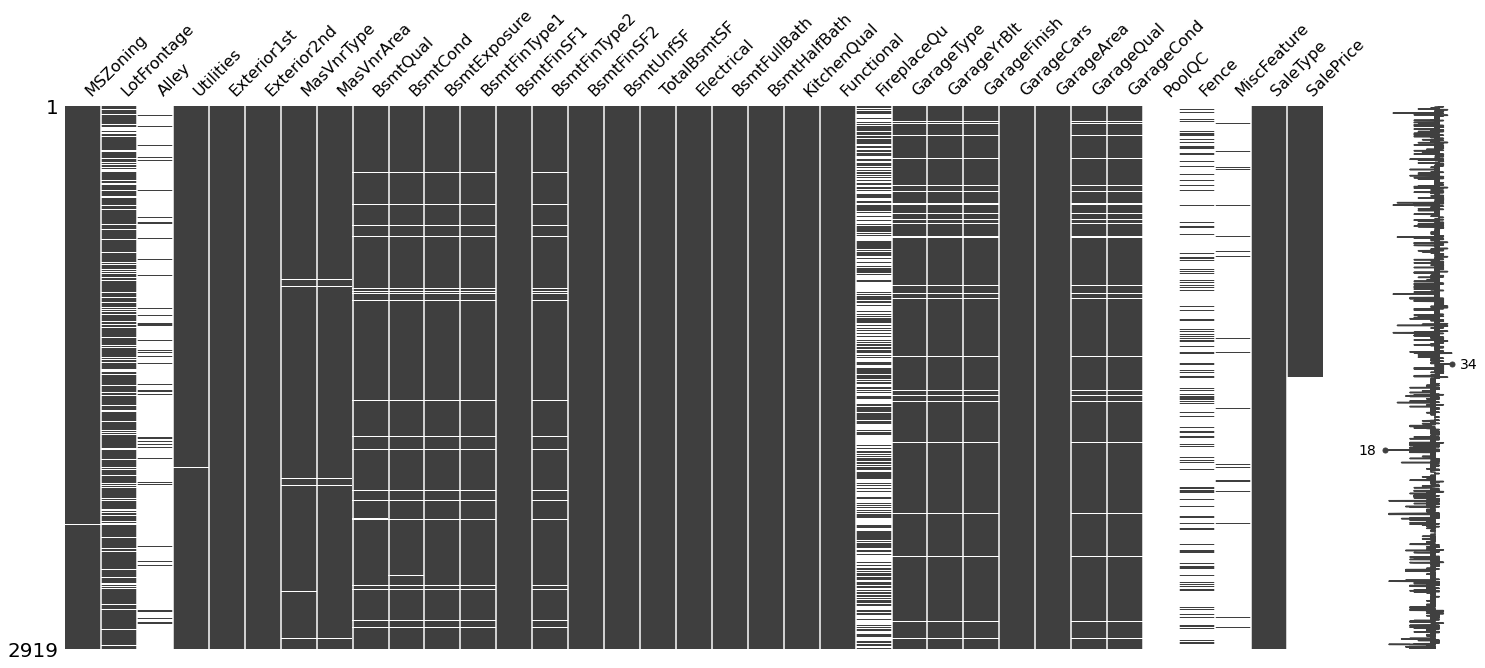

<Figure size 432x288 with 0 Axes>

In [18]:
import missingno as mn
%matplotlib inline 

mn.matrix(missing)
plt.figure()

In [19]:
missing.columns

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

We will handle these missing data on the basis of the data description. Note that some NaN values do have meaning such that the NaN for `PoolQC` is "No Pool" and it should not be considered as a missing value.

#### MSZoning: Identifies the general zoning classification of the sale.

In [20]:
df['MSZoning'].value_counts(dropna=False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

In [21]:
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace=True)

#### LotFrontage: Linear feet of street connected to property

In [22]:
df['LotFrontage'].value_counts(dropna=False)

NaN      486
60.0     276
80.0     137
70.0     133
50.0     117
        ... 
155.0      1
141.0      1
136.0      1
28.0       1
137.0      1
Name: LotFrontage, Length: 129, dtype: int64

In [23]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

#### Alley: Type of alley access to property

In [24]:
df['Alley'].value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [25]:
df['Alley'].fillna("No alley access", inplace=True)

#### Utilities: Type of utilities available

In [26]:
df['Utilities'].value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

In [27]:
df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)

#### Exterior1st: Exterior covering on house & Exterior2nd: Exterior covering on house (if more than one material)

In [28]:
df['Exterior1st'].value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

In [29]:
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace=True)

In [30]:
df['Exterior2nd'].value_counts(dropna=False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

In [31]:
df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace=True)

#### MasVnrType: Masonry veneer type & MasVnrArea: Masonry veneer area in square feet

In [32]:
df['MasVnrType'].value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [33]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

In [34]:
df['MasVnrArea'].value_counts(dropna=False)

0.0      1738
NaN        23
120.0      15
200.0      13
176.0      13
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 445, dtype: int64

In [35]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

#### Bsmt "family": Basement

In [36]:
df['BsmtQual'].value_counts(dropna=False)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64

In [37]:
df['BsmtQual'].fillna("No Basement", inplace=True)

In [38]:
df['BsmtCond'].value_counts(dropna=False)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64

In [39]:
df['BsmtCond'].fillna("No Basement", inplace=True)

In [40]:
df['BsmtExposure'].value_counts(dropna=False)

No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64

In [41]:
df['BsmtExposure'].fillna("No Basement", inplace=True)

In [42]:
df['BsmtFinType1'].value_counts(dropna=False)

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64

In [43]:
df['BsmtFinType1'].fillna("No Basement", inplace=True)

In [44]:
df['BsmtFinSF1'].value_counts(dropna=False)

0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
1022.0      1
939.0       1
1124.0      1
1619.0      1
1106.0      1
Name: BsmtFinSF1, Length: 992, dtype: int64

In [45]:
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean(), inplace=True)

In [46]:
df['BsmtFinType2'].value_counts(dropna=False)

Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [47]:
df['BsmtFinType2'].fillna("No Basement", inplace=True)

In [48]:
sum(df['BsmtFinSF2'].isnull())

1

In [49]:
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace=True)

In [50]:
sum(df['BsmtUnfSF'].isnull())

1

In [51]:
df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean(), inplace=True)

In [52]:
sum(df['TotalBsmtSF'].isnull())

1

In [53]:
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace=True)

#### Electrical: Electrical system

In [54]:
df['Electrical'].value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [55]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

#### BsmtFullBath: Basement full bathrooms & BsmtHalfBath: Basement half bathrooms

In [56]:
df['BsmtFullBath'].unique()

array([ 1.,  0.,  2.,  3., nan])

In [57]:
df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0], inplace=True)

In [58]:
df['BsmtHalfBath'].unique()

array([ 0.,  1.,  2., nan])

In [59]:
df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0], inplace=True)

#### KitchenQual: Kitchen quality

In [60]:
df['KitchenQual'].value_counts(dropna=False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

In [61]:
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)

#### Functional: Home functionality (Assume typical unless deductions are warranted)

In [62]:
df['Functional'].value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

In [63]:
df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)

#### FireplaceQu: Fireplace quality

In [64]:
df['FireplaceQu'].value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [65]:
df['FireplaceQu'].fillna("No Fireplace", inplace=True)

#### Garage "family": Garage

In [66]:
df['GarageType'].value_counts(dropna=False)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [67]:
df['GarageType'].fillna("No Garage", inplace=True)

In [68]:
df['GarageYrBlt'].value_counts(dropna=False)

NaN       159
2005.0    142
2006.0    115
2007.0    115
2004.0     99
         ... 
1933.0      1
1919.0      1
1896.0      1
2207.0      1
1906.0      1
Name: GarageYrBlt, Length: 104, dtype: int64

In [69]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)

In [70]:
df['GarageFinish'].value_counts(dropna=False)

Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64

In [71]:
df['GarageFinish'].fillna("No Garage", inplace=True)

In [72]:
df['GarageCars'].unique()

array([ 2.,  3.,  1.,  0.,  4.,  5., nan])

In [73]:
df['GarageCars'].fillna(df['GarageCars'].mode()[0], inplace=True)

In [74]:
df['GarageArea'].value_counts(dropna=False)

0.0      157
576.0     97
440.0     96
240.0     69
484.0     68
        ... 
443.0      1
424.0      1
263.0      1
962.0      1
803.0      1
Name: GarageArea, Length: 604, dtype: int64

In [75]:
df['GarageArea'].fillna(df['GarageArea'].mean(), inplace=True)

In [76]:
df['GarageQual'].value_counts(dropna=False)

TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64

In [77]:
df['GarageQual'].fillna("No Garage", inplace=True)

In [78]:
df['GarageCond'].value_counts(dropna=False)

TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64

In [79]:
df['GarageCond'].fillna("No Garage", inplace=True)

#### PoolQC: Pool quality

In [80]:
df['PoolQC'].value_counts(dropna=False)

NaN    2909
Gd        4
Ex        4
Fa        2
Name: PoolQC, dtype: int64

In [81]:
df['PoolQC'].fillna("No Pool", inplace=True)

#### Fence: Fence quality

In [82]:
df['Fence'].value_counts(dropna=False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [83]:
df['Fence'].fillna("No Fence", inplace=True)

#### MiscFeature: Miscellaneous feature not covered in other categories

In [84]:
df['MiscFeature'].value_counts(dropna=False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [85]:
df['MiscFeature'].fillna("None", inplace=True)

#### SaleType: Type of sale

In [86]:
df['SaleType'].value_counts(dropna=False)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

In [87]:
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

In [88]:
sum(df.isnull().any())

1

Now there is no missing value and no outlier in our dataset. We will do a feature engineering to select the proper predictors for our model builting. Before that, we need to convert some variables into their proper form. That is, columns like `OverallQual` and `OverallCond` should be in categorical data.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [90]:
train1 = df.iloc[0:1460, :].copy()
test1 = df.iloc[1460:, :].copy()

As mentioned above, we will delete the two rows of outliers with index number 523 and 1298.

In [91]:
train1.drop([523, 1298], axis=0, inplace=True)

In [92]:
train1.shape

(1458, 80)

In [93]:
df['PoolQC'].value_counts()/df.shape[0]

No Pool    0.996574
Gd         0.001370
Ex         0.001370
Fa         0.000685
Name: PoolQC, dtype: float64

During the imputation process, we notice that there are some columns that contain more than 90% same value. For example, the feature `PoolQC` contains 99.66% of value "No Pool". Such feature does not play a significant role in the model, so we decide to eliminate them.

With feature engineering, we decide to retain these predictors.

In [94]:
df['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [95]:
cols = ['LotFrontage', 'LotArea', 'Neighborhood', 'MSSubClass', 'OverallQual', 'OverallCond', 
        'BsmtQual', 'TotalBsmtSF', 'GrLivArea', 'GarageQual', 'KitchenQual', 'YearBuilt', 
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
        'SalePrice']

In [96]:
df1 = pd.concat([train1, test1])

In [97]:
df1 = df1[cols].copy()

In [98]:
df1

,LotFrontage,LotArea,Neighborhood,MSSubClass,OverallQual,OverallCond,BsmtQual,TotalBsmtSF,GrLivArea,GarageQual,KitchenQual,YearBuilt,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
0,65.0,8450,CollgCr,60,7,5,Gd,856.0,1710,TA,Gd,2003,61,0,0,0,208500.0
1,80.0,9600,Veenker,20,6,8,Gd,1262.0,1262,TA,TA,1976,0,0,0,0,181500.0
2,68.0,11250,CollgCr,60,7,5,Gd,920.0,1786,TA,Gd,2001,42,0,0,0,223500.0
3,60.0,9550,Crawfor,70,7,5,TA,756.0,1717,TA,Gd,1915,35,272,0,0,140000.0
4,84.0,14260,NoRidge,60,8,5,Gd,1145.0,2198,TA,Gd,2000,84,0,0,0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,MeadowV,160,4,7,TA,546.0,1092,No Garage,TA,1970,0,0,0,0,NaN
1455,21.0,1894,MeadowV,160,4,5,TA,546.0,1092,TA,TA,1970,24,0,0,0,NaN
1456,160.0,20000,Mitchel,20,5,7,TA,1224.0,1224,TA,TA,1960,0,0,0,0,NaN
1457,62.0,10441,Mitchel,85,5,5,Gd,912.0,970,No Garage,TA,1992,32,0,0,0,NaN


In [99]:
df1['TotalPorch'] = df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['3SsnPorch'] + df1['ScreenPorch']
df1.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)
df1['GrLivArea2'] = df1['GrLivArea'] ** 2

In [100]:
cat = ['OverallQual', 'OverallCond', 'MSSubClass']

In [101]:
for c in cat:
    df1[c] = df1[c].astype(str)

In [102]:
df1 = pd.get_dummies(df1)

In [103]:
df1

,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,YearBuilt,SalePrice,TotalPorch,GrLivArea2,Neighborhood_Blmngtn,Neighborhood_Blueste,...,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,65.0,8450,856.0,1710,2003,208500.0,61,2924100,0,0,...,0,0,0,0,0,1,0,0,1,0
1,80.0,9600,1262.0,1262,1976,181500.0,0,1592644,0,0,...,0,0,0,0,0,1,0,0,0,1
2,68.0,11250,920.0,1786,2001,223500.0,42,3189796,0,0,...,0,0,0,0,0,1,0,0,1,0
3,60.0,9550,756.0,1717,1915,140000.0,307,2948089,0,0,...,0,0,0,0,0,1,0,0,1,0
4,84.0,14260,1145.0,2198,2000,250000.0,84,4831204,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,546.0,1092,1970,NaN,0,1192464,0,0,...,0,0,0,1,0,0,0,0,0,1
1455,21.0,1894,546.0,1092,1970,NaN,24,1192464,0,0,...,0,0,0,0,0,1,0,0,0,1
1456,160.0,20000,1224.0,1224,1960,NaN,0,1498176,0,0,...,0,0,0,0,0,1,0,0,0,1
1457,62.0,10441,912.0,970,1992,NaN,32,940900,0,0,...,0,0,0,1,0,0,0,0,0,1


In [104]:
train2 = df1.iloc[0:1458, :].copy()
test2 = df1.iloc[1458:, :].copy()

In [105]:
X_train = train2.drop(['SalePrice'], axis=1)
X_test = test2.drop(['SalePrice'], axis=1)
y_train = train2['SalePrice'].copy()
y_test = test2['SalePrice'].copy()

Based on the question **How accurately can we perform on predicting the houses sale prices?**, we will build a linear regression with advanced regularization techniques.

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [107]:
y_train = np.log1p(y_train)

In [108]:
poly = PolynomialFeatures(degree=2)

In [109]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [110]:
submission = pd.DataFrame([testId, np.exp(preds)]).T
submission = submission.rename(columns={'Id': 'Id', 'Unnamed 0' :'SalePrice'})

<ipython-input-110-08e02d66aa53>:1: RuntimeWarning: overflow encountered in exp
  submission = pd.DataFrame([testId, np.exp(preds)]).T


In [111]:
submission

,Id,SalePrice
0,1461.0,124698.965648
1,1462.0,161246.920802
2,1463.0,173497.603810
3,1464.0,189618.795466
4,1465.0,216363.197637
...,...,...
1454,2915.0,87382.626272
1455,2916.0,88096.201250
1456,2917.0,157843.663646
1457,2918.0,123588.921304


In [112]:
#submission['SalePrice'].fillna(submission['SalePrice'].mean(), inplace=True)
submission.replace([np.inf, -np.inf], np.nan, inplace=True)
submission['SalePrice'].fillna(submission['SalePrice'].mean(), inplace=True)
submission['Id'] = submission['Id'].astype(int)

In [113]:
submission['SalePrice'].mean()

178721.21132366493

In [114]:
submission.to_csv("D:/Udacity/Project 1/udacity-project-blog-post/submission.csv", index=False)

In [206]:
clf = Lasso(alpha=1)
clf.fit(X_train, y_train)
preds1 = clf.predict(X_test)

In [207]:
submission1 = pd.DataFrame([testId, np.exp(preds1)]).T
submission1 = submission.rename(columns={'Id': 'Id', 'Unnamed 0' :'SalePrice'})

In [208]:
submission1

,Id,SalePrice
0,1461,125859.303341
1,1462,161055.121208
2,1463,172612.999930
3,1464,189451.055217
4,1465,216452.354892
...,...,...
1454,2915,86901.283081
1455,2916,88151.332389
1456,2917,156658.336099
1457,2918,123139.031812


[Back to top](#top)

<a id='result'></a>
## 5. Results

Our multiple linear regression model gives us a score of 0.14054, which is a average level, for the Kaggle Competition.

[Back to top](#top)

<a id='conclusion'></a>
## 6. Conclusion

In conlusion, there is still a room for improvement. For example, we need to consider more on the feature engineering process. 

[Back to top](#top)